In [1]:
# Handling Data
import pandas as pd
import numpy as np

## Lecture des données dans un fichier

La methode **read_csv** permet de lire les données structurées dans un fichier de type csv et autres

In [2]:
df = pd.read_csv('spam_ham_dataset.csv')

## Connaissance des données

In [3]:
# Afficher le debut des données
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
# Afficher la fin des données
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


Il est possible d'ajouter en argument de ses fonction, le nombre de lignes à afficher.
Par defaut, Pandas affiche 5 lignes. il vous est également possible de changer ce paramètre par défaut.

**Dévoir: Changer le nombre de ligne par defaut à 10**

In [5]:
df.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [6]:
df.tail(10)

,Unnamed: 0,label,text,label_num
5161,4979,spam,Subject: penny stocks are about timing\r\nnoma...,1
5162,4162,spam,Subject: anomaly boys from 3881\r\nuosda apapr...,1
5163,1428,ham,Subject: re : meter # : 1266 ; august 2000 / a...,0
5164,4365,spam,Subject: slutty milf wants to meet you\r\ntake...,1
5165,2849,ham,"Subject: fw : crosstex energy , driscoll ranch...",0
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [7]:
# Connaitre le nombre de ligne et de colonne dans les données
df.shape

(5171, 4)

In [8]:
# Avoir les information sur les nom de colonnes, leur type et le nombre de valeurs non manquantes par colonne
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


On peut voir que nous avons toutes les valeurs bien remplies pour toutes les colonnes
D'autres méthodes consiste à utiliser les fonctions **isna** ou **isnull** ceci pour compte les valeurs manquantes

In [9]:
# Total des valeurs manquentes par colonnes
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [25]:
# Pourcentage de valeurs manquante
df.isna().mean()*100

label    0.0
text     0.0
class    0.0
dtype: float64

La connaissance des données peut aussi ce faire en utilisant la methode **describe**. Cette methode calcule les statistique sur les variables quantitative.

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5171.0,2585.000000,1492.883452,0.0,1292.5,2585.0,3877.5,5170.0
label_num,5171.0,0.289886,0.453753,0.0,0.0,0.0,1.0,1.0


In [12]:
# Pour decrire les données comme variables qualitatives ou catégorielles
df.astype('object').describe().transpose()

,count,unique,top,freq
Unnamed: 0,5171,5171,605,1
label,5171,2,ham,3672
text,5171,4993,Subject: calpine daily gas nomination\r\n>\r\n...,20
label_num,5171,2,0,3672


In [13]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

## Nettoyage des données

In [14]:
# drop unnamed column
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [15]:
# rename columns
df.columns = ['label', 'text', 'class']
df.head()

,label,text,class
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


Afficher tout le text sans tronqué pour bien voir le contenu des mail

In [16]:
print(pd.get_option('display.max_colwidth'))
pd.set_option('display.max_colwidth', None)
df.head()

50


,label,text,class
0,ham,"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .",0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 . xls",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !\r\ni know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .\r\non the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about .\r\ni think we all agree that it ' s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up with a potential alternative for how we can get together on that weekend , and then you can let me know which you prefer .\r\nthe first option would be to have a retreat similar to what we ' ve done the past several years . this year we could go to the heartland country inn ( www . . com ) outside of brenham . it ' s a nice place , where we ' d have a 13 - bedroom and a 5 - bedroom house side by side . it ' s in the country , real relaxing , but also close to brenham and only about one hour and 15 minutes from here . we can golf , shop in the antique and craft stores in brenham , eat dinner together at the ranch , and spend time with each other . we ' d meet on saturday , and then return on sunday morning , just like what we ' ve done in the past .\r\nthe second option would be to stay here in houston , have dinner together at a nice restaurant , and then have dessert and a time for visiting and recharging at one of our homes on that saturday evening . this might be easier , but the trade off would be that we wouldn ' t have as much time together . i ' ll let you decide .\r\nemail me back with what would be your preference , and of course if you ' re available on that weekend . the democratic process will prevail - - majority vote will rule ! let me hear from you as soon as possible , preferably by the end of the weekend . and if the vote doesn ' t go your way , no complaining allowed ( like i tend to do ! )\r\nhave a great weekend , great golf , great fishing , great shopping , or whatever makes you happy !\r\nbobby",0
3,spam,"Subject: photoshop , windows , office . cheap . main trending\r\nabasements darer prudently fortuitous undergone\r\nlighthearted charm orinoco taster\r\nrailroad affluent pornographic cuvier\r\nirvin parkhouse blameworthy chlorophyll\r\nrobed diagrammatic fogarty clears bayda\r\ninconveniencing managing represented smartness hashish\r\nacademies shareholders unload badness\r\ndanielson pure caffein\r\nspaniard chargeable levin\r\n",1
4,ham,"Subject: re : indian springs\r\nthis deal is to book the teco pvr revenue . it is my understanding that teco\r\njust sends us a check , i haven ' t received an answer as to whether there is a\r\npredermined price associated with this deal or if teco just lets us know what\r\nwe are giving . i can continue to chase this deal down if you need .",0


In [19]:
pd.set_option('display.max_colwidth', 50)
print (pd.get_option("display.max_rows"))
print (pd.get_option("display.min_rows"))

60
10


### Suppression des doublons

## Analyse uni-variée

In [20]:
# Visialization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


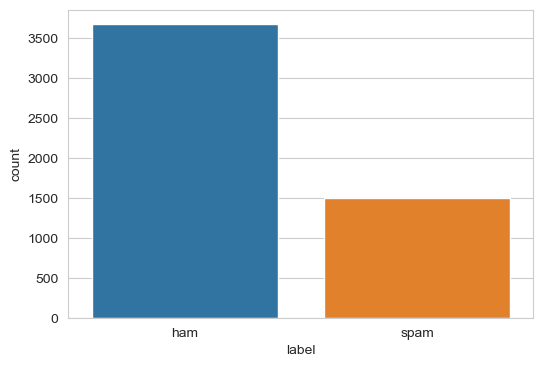

In [21]:
# Barplot describes the count of the class labels
plt.figure(figsize = (6, 4))
sns.countplot(data = df, x = 'label');

## Prétraitement des données textuelles

In [29]:
# For Text processing 
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [31]:
# telecharger les stopwords et les ponctuation
#%%time
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TSAFACK\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TSAFACK\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

### Tokenizer and stopwords removal from the data

In [32]:
%%time
stop_words = set(stopwords.words('english')) 

df['text'] = df['text'].apply(lambda x: ' '.join([ word for word in word_tokenize(x)  if not word in stop_words]))

CPU times: total: 6.06 s
Wall time: 6.46 s


In [33]:
print(list(stop_words))

['but', 'through', 'himself', 'and', 'own', 'an', 'then', 'very', 'ma', 'you', 'didn', 'has', 'over', 'won', "haven't", 's', 'themselves', 'hers', 'being', "you'll", 'were', "weren't", 'itself', "shan't", 'for', "you're", 'nor', 'most', 'more', 'mightn', 'couldn', 'this', 'after', "isn't", 'until', 'weren', 'have', "didn't", 'about', 'while', 'only', "aren't", 'shouldn', 'did', "you've", "you'd", 'herself', 'so', "wouldn't", "needn't", 'what', "mightn't", 'your', 'down', "doesn't", 'any', 'further', 'it', 'during', "mustn't", 'be', 'out', 'when', 'here', 'which', 'off', 'same', 'm', 'because', 'yourself', 'should', 'all', 'does', 'just', 'at', 'shan', 'haven', "shouldn't", 'by', 'don', 'a', 'ain', 'he', 'those', 'where', 'there', 'myself', 'yourselves', 've', 'before', 'me', "hadn't", 'or', 'up', 'few', 'are', 'to', 'll', "hasn't", 'each', 'needn', 'from', 'wasn', 'below', 'how', 'mustn', 'ourselves', 'that', "wasn't", 'hadn', 'wouldn', 'doing', 'will', 'their', 'between', 'as', 'is', 

In [34]:
#pd.set_option("max_columns", None) # show all cols
#pd.set_option('max_colwidth', None) # show full width of showing cols
#pd.set_option("expand_frame_repr", False) # print cols side by side as it's supposed to be

pd.set_option('display.max_colwidth', None)
df.head(10)

,label,text,class
0,ham,"Subject : enron methanol ; meter # : 988291 follow note gave monday , 4 / 3 / 00 { preliminary flow data provided daren } . please override pop ' daily volume { presently zero } reflect daily activity obtain gas control . change needed asap economics purposes .",0
1,ham,"Subject : hpl nom january 9 , 2001 ( see attached file : hplnol 09 . xls ) - hplnol 09 . xls",0
2,ham,"Subject : neon retreat ho ho ho , ' around wonderful time year - - - neon leaders retreat time ! know time year extremely hectic , ' tough think anything past holidays , life go past week december 25 january 1 , ' ' like think minute . calender handed beginning fall semester , retreat scheduled weekend january 5 - 6 . youth ministers conference brad dustin connected week , ' going change date following weekend , january 12 - 13 . comes part need think . think agree ' important us get together time recharge batteries get far spring semester , lot trouble difficult us get away without kids , etc . , brad came potential alternative get together weekend , let know prefer . first option would retreat similar ' done past several years . year could go heartland country inn ( www . . com ) outside brenham . ' nice place , ' 13 - bedroom 5 - bedroom house side side . ' country , real relaxing , also close brenham one hour 15 minutes . golf , shop antique craft stores brenham , eat dinner together ranch , spend time . ' meet saturday , return sunday morning , like ' done past . second option would stay houston , dinner together nice restaurant , dessert time visiting recharging one homes saturday evening . might easier , trade would ' much time together . ' let decide . email back would preference , course ' available weekend . democratic process prevail - - majority vote rule ! let hear soon possible , preferably end weekend . vote ' go way , complaining allowed ( like tend ! ) great weekend , great golf , great fishing , great shopping , whatever makes happy ! bobby",0
3,spam,"Subject : photoshop , windows , office . cheap . main trending abasements darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clears bayda inconveniencing managing represented smartness hashish academies shareholders unload badness danielson pure caffein spaniard chargeable levin",1
4,ham,"Subject : : indian springs deal book teco pvr revenue . understanding teco sends us check , ' received answer whether predermined price associated deal teco lets us know giving . continue chase deal need .",0
5,ham,"Subject : ehronline web address change message intended ehronline users . due recent change ehronline , url ( aka `` web address `` ) accessing ehronline needs changed computer . change involves adding letter `` `` `` http `` reference url . url accessing ehronline : https : / / ehronline . enron . com . change made added url favorite browser .",0
6,ham,"Subject : spring savings certificate - take 30 % save 30 % use customer appreciation spring savings certificate foot locker , lady foot locker , kids foot locker online stores ! welcome customer appreciation spring savings certificate ! use special certificate receive 30 % purchases either stores online . hurry ! 4 - day sale begins thursday , march 22 ends sunday , march 25 . share savings today e - mail offer friends . many items already reduced 30 % discount taken lowest sale price . click print customer appreciation spring savings certificate . must present coupon foot locker , lady foot locker kids foot locker store u . . foot locker canada participating program . ready , set , save ! spring savings discount automatically appear use links type camlem 21 promotion code box checkout . footlocker . com certificate code : camlem 21 ladyfootlocker . com certificate code : camlem 21 kidsfootlocker . com certificate code : camlem 21 remember , returns hassle - free . simply bring items stores nationwide

### Elimination des caratères spéciaux

### Split data in train and test sets

In [35]:
# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [36]:
# Separe feature and target form data
X = df.loc[:, 'text']
y = df.loc[:, 'class']

print(f"Shape of X: {X.shape}\nshape of y: {y.shape}")

Shape of X: (5171,)
shape of y: (5171,)


In [37]:
# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)
print(f"Train Data Shape: {X_train.shape}\nTest Data Shape: {X_test.shape}")

Train Data Shape: (4136,)
Test Data Shape: (1035,)


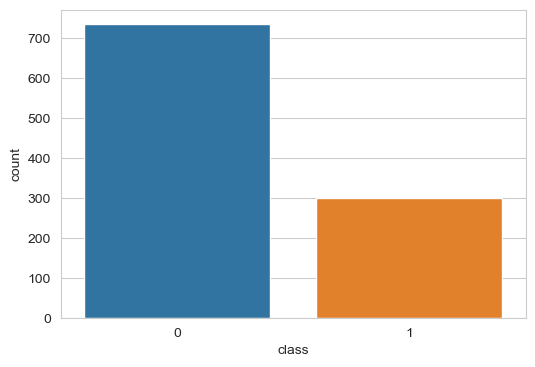

In [38]:
y_test_df = pd.DataFrame(y_test,columns=["class"])
# Barplot describes the count of the class labels
plt.figure(figsize = (6, 4))
sns.countplot(data = y_test_df, x = 'class');

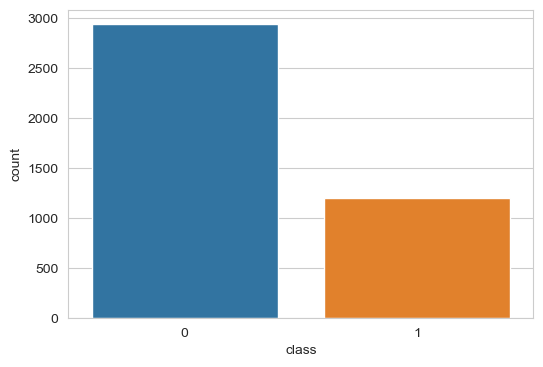

In [39]:
y_train_df = pd.DataFrame(y_train,columns=["class"])
# Barplot describes the count of the class labels
plt.figure(figsize = (6, 4))
sns.countplot(data = y_train_df, x = 'class');

### Compute text feature to build the ML model

In [40]:
# Computer the vocabulary
cVect = CountVectorizer()
cVect.fit(X_train)

# Let's see the vocabulary that has extracted by the count vextorizer
print('NO.of Tokens: ',len(cVect.vocabulary_.keys()))

NO.of Tokens:  45112


In [41]:
# Vacabulary
vocab = cVect.vocabulary_.keys()
print(vocab)

dict_keys(['subject', 'fwd', 'gb', '128', 'revision', 'effective', '22', '00', 'sea', 'robin', 'forwarded', 'ami', 'chokshi', 'corp', 'enron', '06', '21', '2000', '08', '35', 'steve', 'holmes', '19', '20', 'cc', 'please', 'see', 'attached', 'date', 'wed', 'jun', '18', '56', '0500', 'mime', 'version', 'content', 'type', 'multipart', 'mixed', 'boundary', 'ae', '9236', 'caabcdbe', 'thanks', 'gbl', '28', 'reveffo', '62200', 'xls', 'natural', 'gas', 'nomination', 'december', 'methanol', 'nominates', 'following', 'requirements', 'plant', '33', '000', 'mmbtu', 'per', 'day', 'egpfc', 'mtbe', 'morgan', 'point', '12', 'first', '15', 'days', 'month', 'none', 'last', 'half', 'award', 'notification', 'winning', 'notice', 'category', 'winner', 'international', 'lotto', 'netherland', 'il', 'flw', 'co', '33721192', 'pleasure', 'inform', 'emerged', 'netherlands', 'congratulations', 'entitled', 'prize', 'sum', '500', 'euro', 'reference', 'number', 'ticket', '03', '4912', 'selected', 'total', '100', 'nam

In [42]:
# document term vector (dtv)
dtv = cVect.transform(X_train)
print(dtv)

  (0, 0)	4
  (0, 138)	1
  (0, 154)	2
  (0, 183)	3
  (0, 472)	3
  (0, 856)	1
  (0, 894)	1
  (0, 963)	1
  (0, 965)	3
  (0, 1042)	3
  (0, 1083)	4
  (0, 1390)	1
  (0, 1686)	1
  (0, 2464)	1
  (0, 2657)	1
  (0, 3579)	1
  (0, 4765)	1
  (0, 5536)	1
  (0, 6684)	2
  (0, 8768)	1
  (0, 9676)	1
  (0, 10374)	1
  (0, 10968)	1
  (0, 12471)	1
  (0, 12736)	1
  :	:
  (4135, 22156)	1
  (4135, 22259)	1
  (4135, 22867)	1
  (4135, 23774)	1
  (4135, 25167)	1
  (4135, 25599)	1
  (4135, 26166)	1
  (4135, 26458)	1
  (4135, 26851)	1
  (4135, 28534)	1
  (4135, 30670)	1
  (4135, 32505)	1
  (4135, 33066)	1
  (4135, 34266)	1
  (4135, 35947)	1
  (4135, 36789)	1
  (4135, 38167)	1
  (4135, 39082)	1
  (4135, 39916)	1
  (4135, 40347)	1
  (4135, 40551)	2
  (4135, 41939)	1
  (4135, 43565)	1
  (4135, 44009)	1
  (4135, 44163)	1


In [43]:
dtv = dtv.toarray()
print(f"Number of Observations: {dtv.shape[0]}\nTokens/Features: {dtv.shape[1]}")

Number of Observations: 4136
Tokens/Features: 45112


In [44]:
dtv[0, 100]

0

In [45]:
features = dtv

### Logistic Regression.

In [46]:
%%time
lr = LogisticRegression(solver='liblinear', penalty ='l2' , C = 1.0)
lr.fit(features, y_train)

CPU times: total: 2.52 s
Wall time: 3.65 s


LogisticRegression(solver='liblinear')

## Evaluate on the Test data

In [47]:
#Accuracy Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [48]:
# Preprocess the test data
test_dtv = cVect.transform(X_test)
test_dtv = test_dtv.toarray()
print(f"Number of Observations: {test_dtv.shape[0]}\nTokens/Features: {test_dtv.shape[1]}")

Number of Observations: 1035
Tokens/Features: 45112


In [51]:
%%time
pred = lr.predict(test_dtv)

CPU times: total: 203 ms
Wall time: 140 ms


In [52]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  98.35748792270532


In [53]:
# 0 - Not Spam / Ham
# 1 - Spam 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       735
           1       0.95      0.99      0.97       300

    accuracy                           0.98      1035
   macro avg       0.98      0.99      0.98      1035
weighted avg       0.98      0.98      0.98      1035



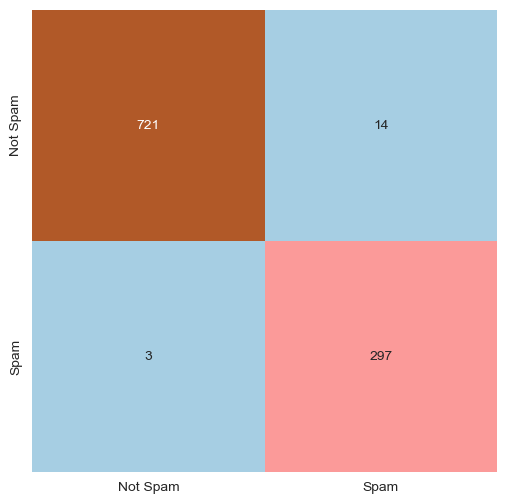

In [54]:
cmat = confusion_matrix(y_test, pred)
plt.figure(figsize = (6, 6))
sns.heatmap(cmat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

In [55]:
# for demo 
def predict_class(lr):
    text = input('Enter Text(Subject of the mail): ')
    
    text = [' '.join([ word for word in word_tokenize(text)  if not word in stop_words])]
    t_dtv = cVect.transform(text).toarray()
    
    pred = lr.predict(t_dtv)
    print('Predicted Class:', end = ' ')
    print('Spam' if pred[0] else 'Not Spam') 
    
    prob = lr.predict_proba(t_dtv)*100
    print(f"Not Spam: {prob[0][0]}%\nSpam: {prob[0][1]}%")
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x =['Not Spam', 'Spam'] , y = [prob[0][0], prob[0][1]])
    plt.xlabel('Class')
    plt.ylabel('Probalility')
    plt.show()

Enter Text(Subject of the mail): Nom d'événement : Entretien d'admission (Évènement Privé)   Lieu: Ceci est une conférence en ligne Zoom.  Vous pouvez rejoindre cette réunion à partir de votre ordinateur, tablette ou smartphone. https://us06web.zoom.us/j/82022005988?pwd=TUxsakM4SlV5ZDFMRlJlYnY2SERBUT09  Mot de passe: 785717  Une seule touche sur l’appareil mobile : +1 646 931 3860,,82022005988# +1 929 205 6099,,82022005988#  Vous pouvez également le faire depuis votre téléphone. US: +1 646 931 3860, +1 929 205 6099, +1 301 715 8592, +1 305 224 1968, +1 309 205 3325, +1 312 626 6799, +1 253 215 8782, +1 346 248 7799, +1 360 209 5623, +1 386 347 5053, +1 507 473 4847, +1 564 217 2000, +1 669 444 9171, +1 669 900 6833, +16892781000, +1 719 359 4580, +1 253 205 0468 ID de la réunion : 820-220-05988  Trouvez votre numéro local :https://us06web.zoom.us/u/kbptX4z70P  Numéro de téléphone: +261 32 29 624 78  Sachant que Setterpreneur peut te rapporter 2 à 5000 €/mois avec une place GARANTIE en 

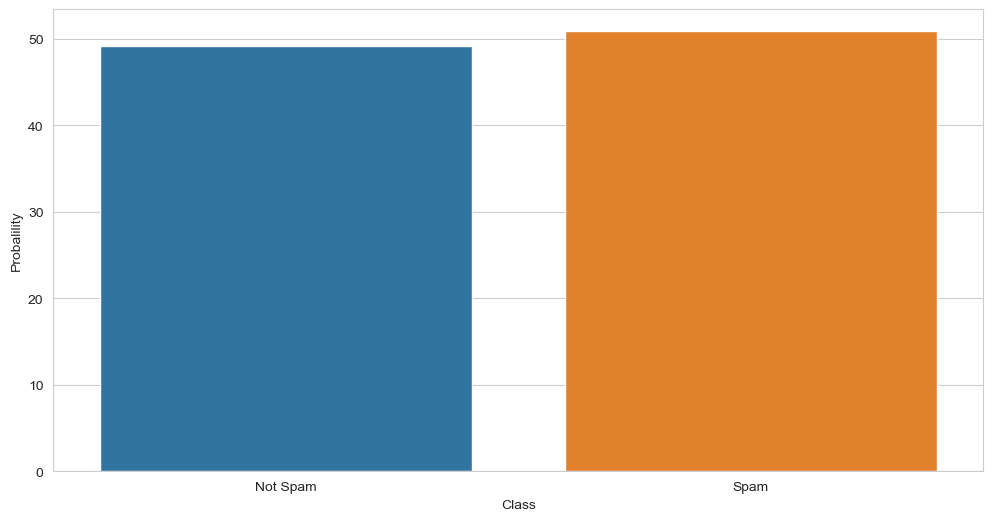

In [59]:
# You won 1000$ prize money in lottery. Click here to avail
# Morning Sir, Found attached my report for december

predict_class(lr)

In [60]:
#Utilisation d'un pipeline
from pprint import pprint
from time import time
import logging
import pickle

In [61]:
# Define pipeline

pipeline = Pipeline(
    [
        ("vect", CountVectorizer(analyzer= 'word', stop_words= 'english')),
        ("tfidf", TfidfTransformer()),
        #("pca", PCA()),
        ("clf",  SGDClassifier()),
    ]
)


In [62]:
# gridSearch parameter
# Parameters to use for grid search. Uncommenting more parameters will give
# better exploring power but will increase processing time in a combinatorial way
parameters = {
    "vect__max_df": (0.5, 0.75),
    # 'vect__max_features': (None, 5000, 10000, 50000),
    "vect__ngram_range": ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    #"pca__n_components": (100, 150,),
    "clf__max_iter": (20,),
    "clf__alpha": (0.00001, 0.000001),
    "clf__penalty": ("l2", "elasticnet"),
}

In [63]:
#define gridSearh 
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

In [64]:

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (1e-05, 1e-06),
 'clf__max_iter': (20,),
 'clf__penalty': ('l2', 'elasticnet'),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.5, 0.75),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 64 candidates, totalling 320 fits
done in 138.933s

Best score: 0.991
Best parameters set:
	clf__alpha: 1e-05
	clf__max_iter: 20
	clf__penalty: 'l2'
	tfidf__norm: 'l2'
	tfidf__use_idf: True
	vect__max_df: 0.5
	vect__ngram_range: (1, 2)


In [65]:
grid_search.best_estimator_

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, ngram_range=(1, 2),
                                 stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(alpha=1e-05, max_iter=20))])

In [66]:
# demo method
def predict_class(pl):
    text = input('Enter Text(Subject of the mail): ')
    #text = [' '.join([ word for word in word_tokenize(text)  if not word in stop_words])]
    #t_dtv = cVect.transform(text).toarray()
    
    pred = pl.predict([text])
    print('Predicted Class:', end = ' ')
    print('Spam' if pred[0] else 'Not Spam') 
    
    """
    prob = pl.predict_proba([text])*100
    print(f"Not Spam: {prob[0][0]}%\nSpam: {prob[0][1]}%")
    plt.figure(figsize=(12, 6))
    sns.barplot(x =['Not Spam', 'Spam'] , y = [prob[0][0], prob[0][1]])
    plt.xlabel('Class')
    plt.ylabel('Probalility')
    plt.show()
    """

In [67]:
# You won 1000$ prize money in lottery. Click here to avail
# Morning Sir, Found attached my report for december

best_estimator = grid_search.best_estimator_
predict_class(best_estimator)

Enter Text(Subject of the mail): Morning Sir, Found attached my report for december
Predicted Class: Not Spam


## Save model for production

In [69]:
filename = 'mail_spam_model.sav'
pickle.dump(best_estimator, open(filename, 'wb'))

In [ ]:
# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)